# Project: Gapminder World Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report is an exploration of data on countries around the world. Gapminder World has collected a variety of data on how people live their lives across the globe. This report will try to identify trends in the following datasets:
* Life expectancy - The average number of years a newborn child would live if current mortality rates stayed the same
* Happiness score (WHR) - Measured using the Cantril life ladder which is explained below 
* The income per person- GDP/capita with inflation adjusted to 2011 Purchasing Power Parity (PPP)
* The unemployment rate for individuals 15 years and over 
* Working hours per week - Calucualted by the total amount of yearly working hours divided by 52 weeks

#### Cantril Life Ladder Method 
It is the national average response to the question of life evaluations asking the following question: "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst life for you. On which stepof the ladder would you say you personally feel you stand at this time?" The dataset expresses the answers as a percentage

### The questions to explore are as follows:
1. Does a higher income lead to a higher life expectancy?
2. Does a higher unemployment rate lead to a lower life expectancy?
3. Does working over 40 hours per week lead to a higher life expectancy?
4. Does working over 40 hours per week lead to a happier nation?
5. Does a higher income mean a nation is more happy?
6. Does a higher unemployment rate mean a nation is less happy?

In [990]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [991]:
df_life_exp = pd.read_csv('life_expectancy_years.csv')
df_happy = pd.read_csv('hapiscore_whr.csv')
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_unemp = pd.read_csv('aged_15plus_unemployment_rate_percent.csv')
df_work_hr = pd.read_csv('working_hours_per_week.csv')

### Data Cleaning for the _df_life_exp_ dataframe

In [992]:
df_life_exp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [993]:
df_life_exp.shape

(187, 302)

In [994]:
df_life_exp.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,83.758152,83.87663,83.996196,84.119022,84.236957,84.358152,84.478804,84.593478,84.71087,84.829891
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,5.600794,5.59444,5.589074,5.577601,5.570850,5.566060,5.556903,5.550234,5.54055,5.532609
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,67.100000,67.30000,67.400000,67.500000,67.600000,67.700000,67.800000,67.900000,68.00000,68.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,79.500000,79.70000,79.800000,79.900000,80.075000,80.200000,80.375000,80.475000,80.57500,80.775000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.200000,84.35000,84.450000,84.550000,84.650000,84.750000,84.850000,85.000000,85.15000,85.250000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,88.125000,88.22500,88.325000,88.500000,88.600000,88.700000,88.800000,88.900000,89.00000,89.100000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.700000,93.90000,94.000000,94.100000,94.200000,94.300000,94.400000,94.500000,94.70000,94.800000


We can see that this data has data that goes up to the year 2100. Since we are only interested in data up to the year 2019, the data for years beyond that will be trimmed off. From the df.shape we can see that we have 302 columns, and the last column is the year 2100, which is 81 years more than we need. So we will select the desired columns by doing 302-81 which equals 221. we will plug this into our .iloc function

In [995]:
df_life_exp = df_life_exp.iloc[:, :221]
df_life_exp

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,59.9,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.6,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9,78.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.3,82.4,82.4,82.5,82.5,82.6,82.7,82.7,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.9,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,...,75.3,75.3,75.2,75.2,75.0,75.0,75.3,75.3,75.2,75.1
183,Vietnam,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,73.5,73.6,73.8,74.0,74.1,74.3,74.4,74.5,74.6,74.7
184,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,68.0,68.1,68.3,68.9,69.0,68.6,68.1,68.1,68.1,68.1
185,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,56.0,57.5,58.8,60.0,61.1,62.0,62.8,63.2,63.7,64.0


In [879]:
df_life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 221 entries, country to 2019
dtypes: float64(220), object(1)
memory usage: 323.0+ KB


Next we will look at how many null values there are, and then drop the countries with null values

In [880]:
df_life_exp.isnull().sum().sum()

516

In [996]:
df_life_exp.dropna(inplace=True)
df_life_exp.isnull().sum().sum()

0

In [997]:
df_life_exp.shape

(184, 221)

This changes the shape of the dataframe from (187, 302) to (184, 221)

In [998]:
#create a list of the countires in df_life_exp
life_exp_countries = []
for i in df_life_exp['country']:
    if i not in life_exp_countries:
        life_exp_countries.append(i) 
len(life_exp_countries)  

184

In [999]:
df_life_exp.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
Length: 221, dtype: object

### Data Cleaning for the _df_happy_ dataframe

In [1000]:
df_happy.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,0.372,0.440,0.476,0.383,0.378,0.357,0.313,0.398,0.422,0.266,0.269,0.257
1,Albania,NaN,NaN,0.463,NaN,0.549,0.527,0.587,0.551,0.455,0.481,0.461,0.451,0.464,0.500,0.488
2,Algeria,NaN,NaN,NaN,NaN,NaN,0.546,0.532,0.560,NaN,0.635,NaN,0.534,0.525,0.504,0.501
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,0.559,0.436,0.394,0.379,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,0.631,0.607,0.596,0.642,0.644,0.678,0.647,0.658,0.667,0.670,0.643,0.604,0.579,0.597


In [885]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  161 non-null    object 
 1   2005     27 non-null     float64
 2   2006     87 non-null     float64
 3   2007     101 non-null    float64
 4   2008     107 non-null    float64
 5   2009     112 non-null    float64
 6   2010     121 non-null    float64
 7   2011     143 non-null    float64
 8   2012     138 non-null    float64
 9   2013     134 non-null    float64
 10  2014     141 non-null    float64
 11  2015     140 non-null    float64
 12  2016     138 non-null    float64
 13  2017     144 non-null    float64
 14  2018     133 non-null    float64
 15  2019     149 non-null    float64
dtypes: float64(15), object(1)
memory usage: 20.2+ KB


In [886]:
df_happy.shape

(161, 16)

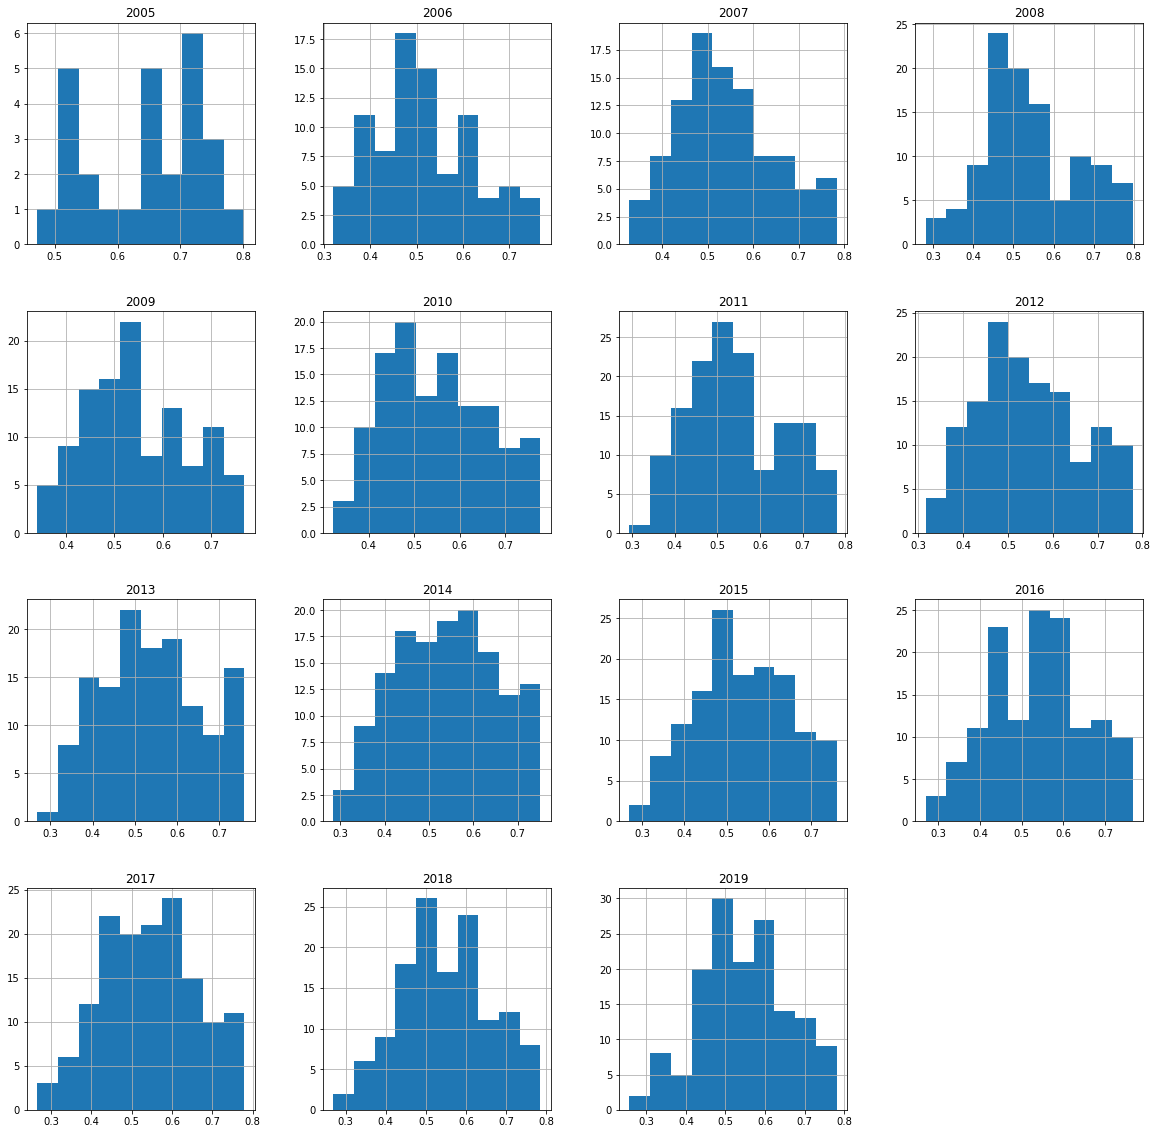

In [887]:
df_happy.hist(figsize=(20,20));

In [888]:
df_happy.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,27.000000,87.000000,101.000000,107.000000,112.000000,121.000000,143.000000,138.000000,134.000000,141.00000,140.000000,138.000000,144.000000,133.000000,149.000000
mean,0.644593,0.518138,0.542119,0.541897,0.545438,0.549256,0.542189,0.543659,0.538104,0.53817,0.539543,0.538486,0.545007,0.548729,0.546013
std,0.091888,0.110137,0.105214,0.118547,0.103771,0.113714,0.109184,0.113156,0.118906,0.11683,0.112399,0.115215,0.114883,0.111007,0.112181
min,0.472000,0.320000,0.328000,0.281000,0.341000,0.323000,0.294000,0.316000,0.269000,0.28400,0.270000,0.269000,0.266000,0.269000,0.257000
25%,0.554000,0.444000,0.467000,0.459000,0.465500,0.461000,0.469000,0.457750,0.450250,0.44800,0.461000,0.451250,0.461250,0.466000,0.468000
50%,0.662000,0.508000,0.522000,0.517000,0.532500,0.546000,0.522000,0.521500,0.524000,0.53100,0.533000,0.537000,0.551500,0.543000,0.550000
75%,0.716000,0.592500,0.614000,0.633500,0.627250,0.635000,0.635500,0.625750,0.630500,0.62800,0.626000,0.613500,0.624000,0.628000,0.623000
max,0.802000,0.767000,0.783000,0.797000,0.768000,0.777000,0.779000,0.778000,0.759000,0.75100,0.760000,0.766000,0.779000,0.786000,0.781000


In [891]:
df_happy.shape

(161, 16)

In [892]:
df_happy.duplicated().sum()

0

In [1001]:
country_happy_avg = df_happy.mean(axis=1)
country_happy_avg

0      0.360917
1      0.498083
2      0.542125
3      0.442000
4      0.633071
         ...   
156    0.612214
157    0.529714
158    0.385750
159    0.456385
160    0.397857
Length: 161, dtype: float64

In [1002]:
df_happy = df_happy.T.fillna(df_happy.mean(axis=1)).T

In [1003]:
df_happy

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.360917,0.360917,0.360917,0.372,0.44,0.476,0.383,0.378,0.357,0.313,0.398,0.422,0.266,0.269,0.257
1,Albania,0.498083,0.498083,0.463,0.498083,0.549,0.527,0.587,0.551,0.455,0.481,0.461,0.451,0.464,0.5,0.488
2,Algeria,0.542125,0.542125,0.542125,0.542125,0.542125,0.546,0.532,0.56,0.542125,0.635,0.542125,0.534,0.525,0.504,0.501
3,Angola,0.442,0.442,0.442,0.442,0.442,0.442,0.559,0.436,0.394,0.379,0.442,0.442,0.442,0.442,0.442
4,Argentina,0.633071,0.631,0.607,0.596,0.642,0.644,0.678,0.647,0.658,0.667,0.67,0.643,0.604,0.579,0.597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Venezuela,0.717,0.653,0.612214,0.626,0.719,0.748,0.658,0.707,0.655,0.614,0.557,0.404,0.507,0.501,0.505
157,Vietnam,0.529714,0.529,0.542,0.548,0.53,0.53,0.577,0.553,0.502,0.508,0.508,0.506,0.518,0.53,0.535
158,Yemen,0.38575,0.38575,0.448,0.38575,0.481,0.435,0.375,0.406,0.422,0.397,0.298,0.383,0.325,0.306,0.353
159,Zambia,0.456385,0.482,0.4,0.473,0.526,0.456385,0.5,0.501,0.524,0.435,0.484,0.435,0.393,0.404,0.376


In [1004]:
df_happy.duplicated().sum()

0

In [1005]:
df_happy.isnull().sum().sum()

0

In [1006]:
df_happy.dtypes

country    object
2005       object
2006       object
2007       object
2008       object
            ...  
2015       object
2016       object
2017       object
2018       object
2019       object
Length: 16, dtype: object

Notice that after applying the mean to fiil the NaN values the datatype was changed to object, so we need to change it back to a float

In [1007]:
df_h = df_happy.iloc[:, 1:].astype(float)

In [1008]:
df_h.dtypes

2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
         ...   
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
Length: 15, dtype: object

In [1009]:
df_h_c = df_happy['country']
df_h_c.to_frame()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
156,Venezuela
157,Vietnam
158,Yemen
159,Zambia


In [1010]:
df_happy_float = df_h_c.to_frame().join(df_h)
df_happy_float

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.360917,0.360917,0.360917,0.372000,0.440000,0.476000,0.383,0.378,0.357000,0.313,0.398000,0.422,0.266,0.269,0.257
1,Albania,0.498083,0.498083,0.463000,0.498083,0.549000,0.527000,0.587,0.551,0.455000,0.481,0.461000,0.451,0.464,0.500,0.488
2,Algeria,0.542125,0.542125,0.542125,0.542125,0.542125,0.546000,0.532,0.560,0.542125,0.635,0.542125,0.534,0.525,0.504,0.501
3,Angola,0.442000,0.442000,0.442000,0.442000,0.442000,0.442000,0.559,0.436,0.394000,0.379,0.442000,0.442,0.442,0.442,0.442
4,Argentina,0.633071,0.631000,0.607000,0.596000,0.642000,0.644000,0.678,0.647,0.658000,0.667,0.670000,0.643,0.604,0.579,0.597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Venezuela,0.717000,0.653000,0.612214,0.626000,0.719000,0.748000,0.658,0.707,0.655000,0.614,0.557000,0.404,0.507,0.501,0.505
157,Vietnam,0.529714,0.529000,0.542000,0.548000,0.530000,0.530000,0.577,0.553,0.502000,0.508,0.508000,0.506,0.518,0.530,0.535
158,Yemen,0.385750,0.385750,0.448000,0.385750,0.481000,0.435000,0.375,0.406,0.422000,0.397,0.298000,0.383,0.325,0.306,0.353
159,Zambia,0.456385,0.482000,0.400000,0.473000,0.526000,0.456385,0.500,0.501,0.524000,0.435,0.484000,0.435,0.393,0.404,0.376


In [1011]:
df_happy_float.dtypes

country     object
2005       float64
2006       float64
2007       float64
2008       float64
            ...   
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
Length: 16, dtype: object

we can see now that the countries column has been added back and that the happiness scores are back to floats

In [1012]:
#create a list of countries in df_happy
happy_countries = []
for i in df_happy['country']:
    if i not in happy_countries:
        happy_countries.append(i)
len(happy_countries)   

161

### Data Cleaning for the _df_income_ dataframe

In [1013]:
df_income

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,1210,1200,1200,1190,1190,1180,1170,1170,1160,...,8270,8420,8580,8760,8930,9110,9300,9490,9680,9880
189,Vietnam,778,778,778,778,778,778,778,778,778,...,11900,12200,12500,12700,13000,13300,13500,13800,14100,14400
190,Yemen,877,879,882,884,887,889,892,894,897,...,3230,3290,3360,3430,3500,3570,3640,3720,3790,3870
191,Zambia,663,665,667,668,670,671,673,675,676,...,3500,3560,3630,3700,3780,3860,3930,4010,4100,4180


In [934]:
df_income.shape

(193, 242)

In [935]:
df_income.duplicated().sum()

0

In [936]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [937]:
df_income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,978.523316,978.948187,980.725389,980.922280,981.911917,982.502591,982.829016,985.419689,980.937824,982.393782,...,23142.378238,23613.119171,24083.461140,24577.430052,25077.678756,25576.476684,26107.564767,26635.953368,27180.512953,27730.725389
std,579.633227,579.915248,582.565512,582.032626,583.963199,584.043985,584.097850,590.514505,578.200194,581.878397,...,23670.673835,24162.379036,24635.072766,25136.440969,25646.475260,26138.360102,26707.571366,27233.418469,27813.430077,28356.570830
min,250.000000,250.000000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,248.000000,248.000000,...,557.000000,566.000000,577.000000,588.000000,600.000000,612.000000,625.000000,637.000000,650.000000,664.000000
25%,592.000000,592.000000,592.000000,592.000000,592.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,5180.000000,5280.000000,5380.000000,5490.000000,5600.000000,5710.000000,5830.000000,5950.000000,6070.000000,6190.000000
50%,817.000000,822.000000,826.000000,831.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,...,15400.000000,15700.000000,16000.000000,16400.000000,16700.000000,17000.000000,17400.000000,17700.000000,18100.000000,18500.000000
75%,1160.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1160.000000,1170.000000,...,34200.000000,34800.000000,35500.000000,36200.000000,37000.000000,37700.000000,38500.000000,39300.000000,40100.000000,40900.000000
max,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,149000.000000,153000.000000,156000.000000,159000.000000,162000.000000,165000.000000,169000.000000,172000.000000,176000.000000,179000.000000


In [938]:
df_income.dtypes

country    object
1800        int64
1801        int64
1802        int64
1803        int64
            ...  
2036        int64
2037        int64
2038        int64
2039        int64
2040        int64
Length: 242, dtype: object

In [1014]:
df_income_2019.isnull().sum().sum()

0

## We will be comparing income to happiness so we will need to make sure the data we have is for the same countries

In [1015]:
#create a list of the countires in df_income
income_countries = []
for i in df_income['country']:
    if i not in income_countries:
        income_countries.append(i) 
len(income_countries)  

193

In [1016]:
#create a list of countries in df_happy
happy_countries = []
for i in df_happy['country']:
    if i not in happy_countries:
        happy_countries.append(i)
len(happy_countries) 

161

we can see that there are more countries in the df_income dataframe so we will subtract from it the df_happy dataframe

In [1017]:
# countries that are in df_income but not df_happy
drop_countries_1 = set(income_countries) - set(happy_countries)
drop_countries_1

{'Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Brunei',
 'Cape Verde',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Grenada',
 'Guinea-Bissau',
 'Kiribati',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Monaco',
 'Nauru',
 'North Korea',
 'Palau',
 'Papua New Guinea',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'Vanuatu'}

In [1018]:
# find index of countriesto drop from df_income
index_names_1 = df_income[df_income['country'].isin(drop_countries_1)].index
index_names_1

Int64Index([  3,   5,  11,  14,  24,  31,  48,  53,  54,  58,  67,  70,  88,
            105, 109, 111, 118, 125, 130, 133, 143, 144, 145, 149, 154, 161,
            162, 163, 172, 174, 179, 187],
           dtype='int64')

In [1019]:
df_income_for_happy = df_income.drop(index_names_1, inplace=True)

In [1020]:
df_income_for_happy

In [1021]:
#trim the data set to only have values up to the year 2019
df_income_2019 = df_income.iloc[:,:-21]
df_income_2019

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1670,1630,1770,1810,1800,1770,1760,1760,1740,1760
1,Albania,667,667,667,667,667,668,668,668,668,...,9930,10200,10400,10500,10700,11000,11400,11800,12300,12700
2,Algeria,715,716,717,718,719,720,721,722,723,...,12900,13000,13200,13300,13500,13800,13900,13900,13900,14000
4,Angola,618,620,623,626,628,631,634,637,640,...,6360,6350,6650,6730,6810,6650,6260,6050,5730,5540
6,Argentina,1640,1640,1650,1650,1660,1660,1670,1680,1680,...,18900,19800,19400,19600,18900,19200,18600,18900,18300,17500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,1210,1200,1200,1190,1190,1180,1170,1170,1160,...,16900,17300,18000,18000,17100,15600,15200,14500,12500,9720
189,Vietnam,778,778,778,778,778,778,778,778,778,...,4430,4660,4860,5070,5310,5610,5900,6230,6610,6970
190,Yemen,877,879,882,884,887,889,892,894,897,...,4570,3880,3860,3940,3830,3110,2620,2400,2360,2340
191,Zambia,663,665,667,668,670,671,673,675,676,...,3340,3420,3570,3630,3690,3680,3700,3720,3740,3700


### Data Cleaning for the  _df_unemp_ dataframe

In [946]:
df_unemp

,country,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0249,NaN,NaN,NaN,0.0169,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1310,0.1370,0.1410,0.13500,0.1340,0.1590,0.1750,0.1710,0.1520,0.1380
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1130,0.1020,0.0996,0.09960,0.1100,0.0982,0.1020,0.1120,0.1020,0.1360
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0943,0.16800,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0625,0.0610,0.0711,0.06900,0.0660,NaN,NaN,NaN,NaN,NaN
182,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0238,0.0174,0.0111,0.00999,0.0103,0.0125,0.0126,0.0186,0.0185,0.0189
183,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1350,NaN,NaN,NaN
184,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0793,NaN,NaN,NaN,0.0785,NaN,NaN,NaN,NaN,NaN


In [947]:
df_unemp.isnull().sum().sum()

10178

In [948]:
df_unemp.describe()

,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,1.000,1.000,1.000,1.000,1.000,1.00,2.000000,2.000000,2.000000,2.000000,...,98.000000,103.000000,107.000000,101.000000,109.000000,104.000000,109.000000,105.000000,105.000000,92.000000
mean,0.039,0.038,0.059,0.053,0.033,0.03,0.024000,0.039000,0.034500,0.032000,...,0.075865,0.085512,0.085181,0.087914,0.089051,0.092544,0.086416,0.087794,0.084108,0.080075
std,NaN,NaN,NaN,NaN,NaN,NaN,0.007071,0.022627,0.013435,0.012728,...,0.058822,0.052846,0.061635,0.061161,0.062024,0.066562,0.062003,0.066966,0.059509,0.054533
min,0.039,0.038,0.059,0.053,0.033,0.03,0.019000,0.023000,0.025000,0.023000,...,0.003100,0.003100,0.006220,0.005600,0.004800,0.002700,0.001900,0.001600,0.001400,0.001400
25%,0.039,0.038,0.059,0.053,0.033,0.03,0.021500,0.031000,0.029750,0.027500,...,0.041475,0.053600,0.042400,0.045600,0.048700,0.046725,0.048000,0.045600,0.046000,0.042025
50%,0.039,0.038,0.059,0.053,0.033,0.03,0.024000,0.039000,0.034500,0.032000,...,0.062400,0.077400,0.073700,0.071800,0.074700,0.070850,0.066600,0.068100,0.064500,0.062500
75%,0.039,0.038,0.059,0.053,0.033,0.03,0.026500,0.047000,0.039250,0.036500,...,0.084450,0.101000,0.101300,0.113000,0.116000,0.118250,0.108000,0.104000,0.101000,0.098325
max,0.039,0.038,0.059,0.053,0.033,0.03,0.029000,0.055000,0.044000,0.041000,...,0.355000,0.322000,0.320000,0.314000,0.310000,0.290000,0.280000,0.365000,0.269000,0.274000


In [1022]:
country_unemp_avg = df_unemp.mean(axis=1)
country_unemp_avg

0      0.020900
1      0.148455
2      0.178850
3      0.131150
4      0.060000
         ...   
181    0.088543
182    0.019175
183    0.125000
184    0.111700
185    0.065900
Length: 186, dtype: float64

In [1023]:
df_unemp = df_unemp.T.fillna(df_unemp.mean(axis=1)).T

In [1024]:
df_unemp

,country,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.0209,0.0209,0.0209,0.0209,0.0209,0.0209,0.0209,0.0209,0.0209,...,0.0249,0.0209,0.0209,0.0209,0.0169,0.0209,0.0209,0.0209,0.0209,0.0209
1,Albania,0.148455,0.148455,0.148455,0.148455,0.148455,0.148455,0.148455,0.148455,0.148455,...,0.131,0.137,0.141,0.135,0.134,0.159,0.175,0.171,0.152,0.138
2,Algeria,0.17885,0.17885,0.17885,0.17885,0.17885,0.17885,0.17885,0.17885,0.17885,...,0.113,0.102,0.0996,0.0996,0.11,0.0982,0.102,0.112,0.102,0.136
3,Angola,0.13115,0.13115,0.13115,0.13115,0.13115,0.13115,0.13115,0.13115,0.13115,...,0.13115,0.13115,0.0943,0.168,0.13115,0.13115,0.13115,0.13115,0.13115,0.13115
4,Antigua and Barbuda,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,0.0885429,0.0885429,0.0885429,0.0885429,0.0885429,0.0885429,0.0885429,0.0885429,0.0885429,...,0.0625,0.061,0.0711,0.069,0.066,0.0885429,0.0885429,0.0885429,0.0885429,0.0885429
182,Vietnam,0.0191745,0.0191745,0.0191745,0.0191745,0.0191745,0.0191745,0.0191745,0.0191745,0.0191745,...,0.0238,0.0174,0.0111,0.00999,0.0103,0.0125,0.0126,0.0186,0.0185,0.0189
183,Yemen,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,...,0.125,0.125,0.125,0.125,0.125,0.125,0.135,0.125,0.125,0.125
184,Zambia,0.1117,0.1117,0.1117,0.1117,0.1117,0.1117,0.1117,0.1117,0.1117,...,0.0793,0.1117,0.1117,0.1117,0.0785,0.1117,0.1117,0.1117,0.1117,0.1117


In [1025]:
df_unemp.isnull().sum().sum()

0

In [1026]:
df_unemp.describe()

,country,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,186,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,...,186.000,186.0,186.00,186.0000,186.000,186.000,186.000,186.0000,186.0000,186.000
unique,186,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,186.0000,...,180.000,172.0,178.00,175.0000,171.000,175.000,175.000,176.0000,178.0000,178.000
top,Antigua and Barbuda,0.0271,0.0271,0.0271,0.0271,0.0271,0.0271,0.0271,0.0271,0.0271,...,0.113,0.1,0.13,0.0411,0.168,0.159,0.036,0.0681,0.0681,0.112
freq,1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,3.000,3.0,2.00,3.0000,2.000,3.000,3.000,3.0000,2.0000,2.000


In [1027]:
df_unemp.duplicated().sum()

0

We will be compating unemployment number to life expectancy and to happiness score. Therefore we will match the datasets to have the same countries

In [1028]:
#create a list of countries in df_unemp
unemp_countries = []
for i in df_unemp['country']:
    if i not in unemp_countries:
        unemp_countries.append(i)
len(unemp_countries)  

186

In [1029]:
#create a list of the countires in df_life_exp
life_exp_countries = []
for i in df_life_exp['country']:
    if i not in life_exp_countries:
        life_exp_countries.append(i) 
len(life_exp_countries)  

184

In [1030]:
#create a list of countries in df_happy
happy_countries = []
for i in df_happy['country']:
    if i not in happy_countries:
        happy_countries.append(i)
len(happy_countries)  

161

In [1031]:
# countries that are in df_life_exp but not df_unemp
drop_countries_2 = set(life_exp_countries) - set(unemp_countries)
drop_countries_2

{'Central African Republic',
 'Djibouti',
 'Eritrea',
 'Guinea-Bissau',
 'Micronesia, Fed. Sts.',
 'North Korea',
 'Somalia'}

In [1032]:
# find index of countriesto drop from df_life_exp
index_names_2 = df_life_exp[df_life_exp['country'].isin(drop_countries_2)].index
index_names_2

Int64Index([32, 47, 54, 70, 109, 123, 151], dtype='int64')

In [1033]:
df_unemp_for_life = df_life_exp.drop(index_names_2, inplace=True)

In [1034]:
df_unemp_for_life

In [1035]:
# countries that are in df_unemp but not df_happy
drop_countries_3 = set(unemp_countries) - set(happy_countries)
drop_countries_3

{'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Brunei',
 'Cape Verde',
 'Dominica',
 'Equatorial Guinea',
 'Fiji',
 'Grenada',
 'Kiribati',
 'Liechtenstein',
 'Marshall Islands',
 'Monaco',
 'Nauru',
 'Palau',
 'Papua New Guinea',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'Vanuatu'}

In [1036]:
# find index of countriesto drop from df_happy
index_names_3 = df_happy[df_happy['country'].isin(drop_countries_3)].index
index_names_3

Int64Index([], dtype='int64')

### Data Cleaning for the _df_work_hr_ dataframe

In [1037]:
df_work_hr

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.2,42.1,41.1,35.6,39.5,40.9,38.0,38.8,39.6,40.3
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.2,NaN,NaN,43.7
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.6,39.8,40.2,40.2,39.2,39.0,38.4,NaN,42.9,37.7
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.5,35.0,37.7,37.2,36.0,38.3,40.4,38.3,37.9,NaN
4,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.5,33.9,34.1,34.0,34.0,33.9,33.7,33.6,33.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.3,39.2,38.8,38.6,38.2,NaN,NaN,NaN,NaN,NaN
123,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.6,45.0,42.7,41.8,40.9,40.4,40.9,41.3,40.3
124,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.0,NaN,NaN,NaN,41.5,NaN,NaN,NaN


In [1038]:
df_work_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  126 non-null    object 
 1   1970     2 non-null      float64
 2   1971     2 non-null      float64
 3   1972     2 non-null      float64
 4   1973     2 non-null      float64
 5   1974     2 non-null      float64
 6   1975     2 non-null      float64
 7   1976     4 non-null      float64
 8   1977     5 non-null      float64
 9   1978     4 non-null      float64
 10  1979     5 non-null      float64
 11  1980     6 non-null      float64
 12  1981     7 non-null      float64
 13  1982     7 non-null      float64
 14  1983     7 non-null      float64
 15  1984     7 non-null      float64
 16  1985     8 non-null      float64
 17  1986     7 non-null      float64
 18  1987     10 non-null     float64
 19  1988     11 non-null     float64
 20  1989     10 non-null     float64
 21  1990     11 non-

In [1039]:
df_work_hr.isnull().sum().sum()

4405

In [1040]:
df_work_hr.shape

(126, 49)

In [1041]:
df_work_hr.dtypes

country     object
1970       float64
1971       float64
1972       float64
1973       float64
            ...   
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
Length: 49, dtype: object

In [1042]:
df_work_hr.nunique()

country    126
1970         2
1971         2
1972         2
1973         2
          ... 
2013        66
2014        69
2015        67
2016        64
2017        63
Length: 49, dtype: int64

In [1043]:
df_work_hr.duplicated().sum()

0

In [1044]:
#preparation to fill NaN values
country_work_avg = df_work_hr.mean(axis=1)
country_work_avg

0      40.166667
1      42.950000
2      40.938462
3      40.375000
4      34.893333
         ...    
121    42.785714
122    39.237500
123    43.528571
124    41.750000
125    48.200000
Length: 126, dtype: float64

In [1045]:
df_work_hr = df_work_hr.T.fillna(df_work_hr.mean(axis=1)).T
df_work_hr

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,40.1667,40.1667,40.1667,40.1667,40.1667,40.1667,40.1667,40.1667,40.1667,...,42.2,42.1,41.1,35.6,39.5,40.9,38,38.8,39.6,40.3
1,Algeria,42.95,42.95,42.95,42.95,42.95,42.95,42.95,42.95,42.95,...,42.95,42.95,42.95,42.95,42.95,42.95,42.2,42.95,42.95,43.7
2,Argentina,40.9385,40.9385,40.9385,40.9385,40.9385,40.9385,40.9385,40.9385,40.9385,...,40.6,39.8,40.2,40.2,39.2,39,38.4,40.9385,42.9,37.7
3,Armenia,40.375,40.375,40.375,40.375,40.375,40.375,40.375,40.375,40.375,...,38.5,35,37.7,37.2,36,38.3,40.4,38.3,37.9,40.375
4,Australia,34.8933,34.8933,34.8933,34.8933,34.8933,34.8933,34.8933,34.8933,34.8933,...,34.5,33.9,34.1,34,34,33.9,33.7,33.6,33.4,34.8933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Uruguay,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,...,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857,42.7857
122,Venezuela,39.2375,39.2375,39.2375,39.2375,39.2375,39.2375,39.2375,39.2375,39.2375,...,40.3,39.2,38.8,38.6,38.2,39.2375,39.2375,39.2375,39.2375,39.2375
123,Vietnam,43.5286,43.5286,43.5286,43.5286,43.5286,43.5286,43.5286,43.5286,43.5286,...,43.5286,42.6,45,42.7,41.8,40.9,40.4,40.9,41.3,40.3
124,Yemen,41.75,41.75,41.75,41.75,41.75,41.75,41.75,41.75,41.75,...,41.75,41.75,42,41.75,41.75,41.75,41.5,41.75,41.75,41.75


In [1046]:
df_work_hr.isnull().sum().sum()

0

In [1047]:
#create a list of the countires in df_work_hr
work_countries = []
for i in df_work_hr['country']:
    if i not in work_countries:
        work_countries.append(i) 
len(work_countries) 

126

In [1054]:
work_countries

['Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Congo, Dem. Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gambia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal'

Since we will be comparing Working Hours VS Life Expectancy, and Working Hours VS Happiness Score we will need to create 2 dataframes that contain information for the same countries

In [1049]:
# countries that are in df_life_exp but not df_work_hr
drop_countries_3 = set(life_exp_countries) - set(work_countries)
len(drop_countries_3)

58

In [1050]:
# find index of countriesto drop from df_life_exp
index_names_3 = df_life_exp[df_life_exp['country'].isin(drop_countries_3)].index
index_names_3

Int64Index([  0,   4,   5,  11,  12,  14,  19,  27,  29,  31,  33,  37,  39,
             53,  56,  58,  61,  63,  67,  69,  71,  72,  76,  79,  85,  88,
             89,  93,  94,  96, 100, 106, 121, 126, 130, 141, 150, 154, 157,
            158, 159, 160, 163, 168, 169, 170, 171, 173, 180, 181, 185],
           dtype='int64')

In [1051]:
# create dataframe to find common countries in working hours and life expectancy
life_vs_work = df_life_exp.drop(index_names_3, inplace=True)

In [1053]:
life_vs_work

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1. Does a higher income lead to a higher life expectancy?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Find the life expectancy of the United States throughout the years

In [1132]:
us_life_exp = df_life_exp.loc[df_life_exp['country'] == 'United States']
us_life_exp

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
178,United States,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,...,78.7,78.8,78.9,78.9,78.9,78.8,78.6,78.6,78.6,78.6


In [1133]:
# check to see if there are any null years
us_life_exp.isnull().sum().sum()

0

In [1134]:
# drop the country column of us_life_exp
us_life_exp = us_life_exp.drop(columns='country')

In [1135]:
us_life_exp

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
178,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,...,78.7,78.8,78.9,78.9,78.9,78.8,78.6,78.6,78.6,78.6


In [1138]:
# plot the us_life_exp dataframe
# df.squeeze() is used to convert the dataframe into a series
year = np.arange(1800,2020,1)
rate = us_life_exp.squeeze()

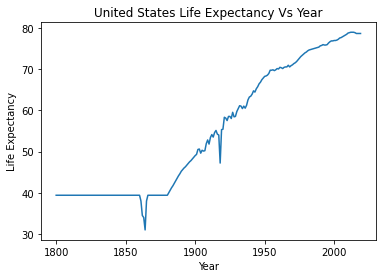

In [1140]:
plt.plot(year, rate)
plt.title('United States Life Expectancy Vs Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

### Find the happiness score of the United States throughout the years

In [1181]:
us_happy = df_happy_float.loc[df_happy_float['country'] == 'United States']
us_happy

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
153,United States,0.709357,0.718,0.751,0.728,0.716,0.716,0.712,0.703,0.725,0.715,0.686,0.68,0.699,0.688,0.694


In [1182]:
us_happy.isnull().sum().sum()

0

In [1183]:
us_happy = us_happy.drop(columns='country')
us_happy

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
153,0.709357,0.718,0.751,0.728,0.716,0.716,0.712,0.703,0.725,0.715,0.686,0.68,0.699,0.688,0.694


In [1186]:
#plot the happiness score of the US
year = np.arange(2005,2020,1)
happy = us_happy.squeeze()

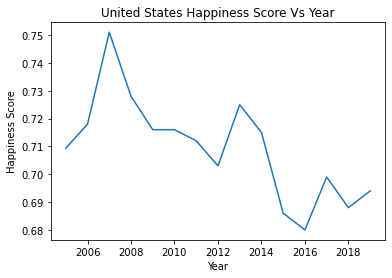

In [1187]:
plt.plot(year, happy)
plt.title('United States Happiness Score Vs Year')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

### Find the income of the United States throughout the years

In [1189]:
us_income = df_income_2019.loc[df_income_2019['country'] == 'United States']
us_income

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
184,United States,1980,2020,2050,2020,2010,2060,2090,2110,1970,...,49500,49900,50600,51200,52100,53200,53600,54500,55700,56700


In [1190]:
us_income.isnull().sum().sum()

0

In [1191]:
us_income = us_income.drop(columns='country')
us_income

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
184,1980,2020,2050,2020,2010,2060,2090,2110,1970,2060,...,49500,49900,50600,51200,52100,53200,53600,54500,55700,56700


In [1192]:
year = np.arange(1800,2020,1)
income = us_income.squeeze()

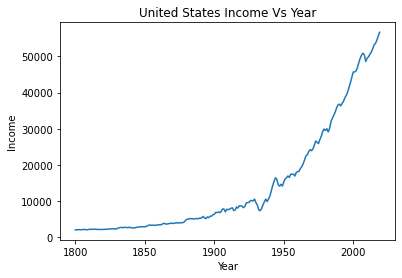

In [1193]:
plt.plot(year, income)
plt.title('United States Income Vs Year')
plt.xlabel('Year')
plt.ylabel('Income')
plt.show()

### Find the working hours of the United States throughout the years


In [1194]:
us_work_hr = df_work_hr.loc[df_work_hr['country'] == 'United States']
us_work_hr

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
120,United States,37.9952,37.9952,37.9952,37.9952,37.9952,37.9952,38.7,38.8,39,...,36.7,35.7,36.1,36.2,36.4,36.6,36.6,36.6,36.7,36.6


In [1195]:
us_work_hr.isnull().sum().sum()

0

In [1196]:
us_work_hr = us_work_hr.drop(columns='country')
us_work_hr

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
120,37.9952,37.9952,37.9952,37.9952,37.9952,37.9952,38.7,38.8,39,38.9,...,36.7,35.7,36.1,36.2,36.4,36.6,36.6,36.6,36.7,36.6


In [1197]:
year = np.arange(1970,2018,1)
hours = us_work_hr.squeeze()

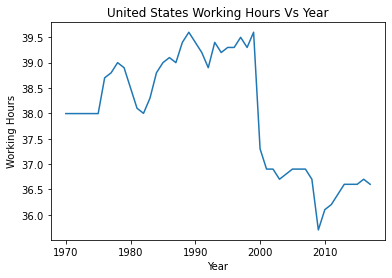

In [1201]:
plt.plot(year, hours)
plt.title('United States Working Hours Vs Year')
plt.xlabel('Year')
plt.ylabel('Working Hours')
plt.figsize=(40,10)
plt.show()

### Find the unemployment rate of the United States throughout the years

In [1202]:
us_unemp = df_unemp.loc[df_unemp['country'] == 'United States']
us_unemp

,country,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
177,United States,0.039,0.038,0.059,0.053,0.033,0.03,0.029,0.055,0.044,...,0.0578,0.0925,0.0963,0.0895,0.0807,0.0737,0.0617,0.0528,0.0487,0.0436


In [1204]:
us_unemp.isnull().sum().sum()

0

In [1205]:
us_unemp = us_unemp.drop(columns='country')
us_unemp

,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
177,0.039,0.038,0.059,0.053,0.033,0.03,0.029,0.055,0.044,0.041,...,0.0578,0.0925,0.0963,0.0895,0.0807,0.0737,0.0617,0.0528,0.0487,0.0436


In [1212]:
year = np.arange(1947,2018,1)
rate =  us_unemp.squeeze()

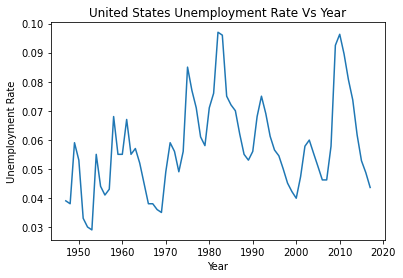

In [1213]:
plt.plot(year, rate)
plt.title('United States Unemployment Rate Vs Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### 2. Does a higher unemployment rate lead to a lower life expectancy?


### 3. Does working over 40 hours per week lead to a higher life expectancy?


### 4. Does working over 40 hours per week lead to a happier nation?


### 5. Does a higher income mean a nation is more happy?


### 6. Does a higher unemployment rate mean a nation is less happy?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!